In [171]:
%matplotlib inline
import numpy as np
import pandas as pd
from cycler import cycler
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, GridSearchCV

In [172]:
original_data = pd.read_csv('piter_filtered.csv')
my_data = original_data
my_data.head(10)

,Latitude,Longitude,City,Area,Address,Rooms,Floor/Total floors,Material,Total area,Live area,Kitchen,Toilet type,Price,Link,Seller,Comment
0,59.911448,30.308232,Санкт-Петербург,Адмиралтейский район,Измайловский пр. 16,1,4/7,СФ,28.8,19.3,3.0,Р,2750,http://www.bn.ru/detail/flats/1133049.html,АН Панорама,"доля, торг, ОС в коммун. кв"
1,59.939095,30.315868,Санкт-Петербург,Адмиралтейский район,Грибоедова кан. наб. 144,1,1/5,СФК,27.0,18.5,4.0,С,3455,http://www.bn.ru/detail/flats/668279.html,Аристократ,ХС. ДГ. Более 3-х лет.
2,59.920230,30.283214,Санкт-Петербург,Адмиралтейский район,Володи Ермака ул. 17,1,1/6,К,42.0,26.0,9.0,Р,3700,http://www.bn.ru/detail/flats/1141100.html,Рудаков-Н,высок эт
3,59.917231,30.284741,Санкт-Петербург,Адмиралтейский район,Садовая ул. 122,1,1/4,К,31.0,16.9,9.0,С,3800,http://www.bn.ru/detail/flats/1182387.html,Итака,"1-27218 ХС, ПП"
4,59.919545,30.280834,Санкт-Петербург,Адмиралтейский район,Псковская ул. 22,1,5/6,К,29.3,16.7,5.0,Р,4000,http://www.bn.ru/detail/flats/1141107.html,Итака,1-22690 ХСб3лБалкВанная
5,59.917231,30.284741,Санкт-Петербург,Адмиралтейский район,Садовая ул. 122,1,1/4,СФ,30.6,17.0,6.0,С,4000,http://www.bn.ru/detail/flats/1133060.html,АРИН,"ХС, ПП, зеленый двор"
6,59.925655,30.305870,Санкт-Петербург,Адмиралтейский район,Б. Подьяческая ул. 8,1,1/5,СФ,43.5,24.5,6.7,Р,4070,http://www.bn.ru/detail/flats/1157867.html,Эксперт,89650763135
7,59.915977,30.328992,Санкт-Петербург,Адмиралтейский район,Рузовская ул. 19,1,1/6,СФ,47.0,18.2,14.6,С,4200,http://www.bn.ru/detail/flats/1113885.html,Норд,9098453 отд. входХС. 3г. есть
8,59.915675,30.297884,Санкт-Петербург,Адмиралтейский район,Троицкий пр. 20,1,5/5,К,33.3,15.4,7.3,Р,4554,http://www.bn.ru/detail/flats/1183451.html,АВЕНТИН,"Закрытый двор. ВПП, ДГ"
9,59.906012,30.276522,Санкт-Петербург,Адмиралтейский район,Старо-­Петергофский пр. 28,1,4/5,РЕК,35.4,29.9,8.0,С,4708,http://www.bn.ru/detail/flats/1175887.html,Primatech,"воен. ип-ка, субсидии"


In [173]:
# y = my_data['Total area']
# s=pd.Series(my_data['Material'])
# Material=pd.get_dummies(s)
# s1=pd.Series(my_data['Toilet type'])
# ToiletType=pd.get_dummies(s1)
# df = pd.DataFrame({'Live area': my_data['Live area'], 'Kitchen': my_data['Kitchen'], 'Price': my_data['Price'], })
# df.join(ToiletType)
# df.join(Material)
y = my_data['Price']
s = pd.Series(my_data['Seller'])
Seller = pd.get_dummies(s)
s1 = pd.Series(my_data['City'])
City = pd.get_dummies(s1)
s2 = pd.Series(my_data['Area'])
Area = pd.get_dummies(s2)

df = pd.DataFrame({'Rooms': my_data['Rooms'], 'Live area': my_data['Live area'], 'Total area': my_data['Total area'], 'Price': my_data['Price'], 'Kitchen': my_data['Kitchen'] })

df.join(Seller)
df.join(City)
df.join(Area)

,Rooms,Live area,Total area,Price,Kitchen,Адмиралтейский район,Василеостровский район,Выборгский район,Калининский район,Кировский район,...,Курортный район,Московский район,Невский район,Область,Петроградский район,Петродворцовый район,Приморский район,Пушкинский район,Фрунзенский район,Центральный район
0,1,19.3,28.8,2750,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,18.5,27.0,3455,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,42.0,3700,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,16.9,31.0,3800,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,16.7,29.3,4000,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6207,8,140.0,250.5,24000,20.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6208,9,177.0,245.3,30000,16.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6209,10,270.0,310.0,140000,24.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6210,12,185.0,305.0,85000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [174]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [175]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso.coef_

array([0., 0., 0., 1., 0.])

In [176]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
lasso.coef_

array([0.        , 0.        , 0.        , 0.99999994, 0.        ])

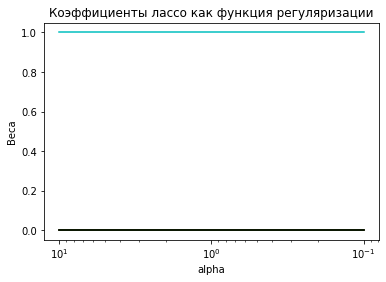

In [177]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("Веса")
plt.title("Коэффициенты лассо как функция регуляризации")
plt.axis("tight")
plt.show();

In [178]:
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=17)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17

In [179]:
lasso_cv.coef_

array([0., 0., 0., 1., 0.])

In [180]:
lasso_cv.alpha_

0.1

In [181]:
cross_val_score(Lasso(lasso_cv.alpha_), X_train, y_train, cv=3, scoring="neg_mean_squared_error")

array([-1.74844845e-11, -7.30061081e-10, -1.47523954e-11])

In [182]:
abs(
    np.mean(
        cross_val_score(
            Lasso(lasso_cv.alpha_), X_train, y_train, cv=3, scoring="neg_mean_squared_error"
        )
    )
)

2.5409932023238523e-10

In [183]:
abs(np.mean(cross_val_score(Lasso(9.95), X_train, y_train, cv=3, scoring="neg_mean_squared_error")))

2.515647605667425e-06

In [184]:
lasso_cv.alphas[:10]  # значения параметров на входе

array([0.1       , 0.14974874, 0.19949749, 0.24924623, 0.29899497,
       0.34874372, 0.39849246, 0.44824121, 0.49798995, 0.54773869])

In [185]:
lasso_cv.alphas_[:10]

array([10.        ,  9.95025126,  9.90050251,  9.85075377,  9.80100503,
        9.75125628,  9.70150754,  9.65175879,  9.60201005,  9.55226131])

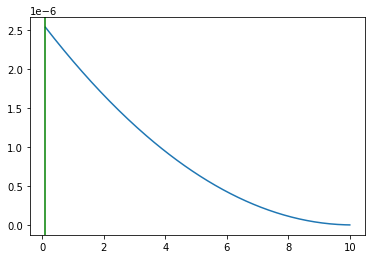

In [186]:
plt.plot(lasso_cv.alphas, lasso_cv.mse_path_.mean(1))  # неверно
plt.axvline(lasso_cv.alpha_, c="g");

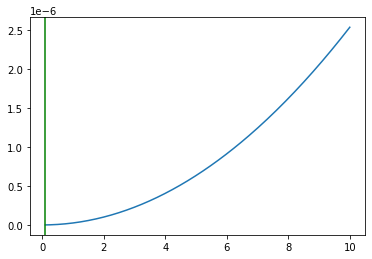

In [187]:
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(1))  # верно
plt.axvline(lasso_cv.alpha_, c="g");

In [188]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [189]:
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=3)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [190]:
ridge_cv.alpha_

0.01

In [191]:
ridge_cv.coef_

array([-1.33697872e-12, -2.23558898e-12,  4.05626969e-12,  1.00000000e+00,
        2.19480224e-12])

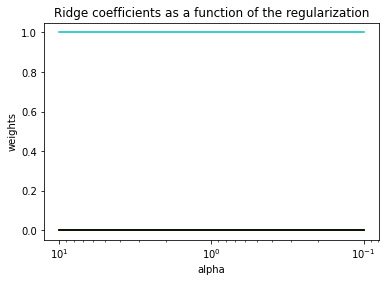

In [192]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X_train, y_train)
    coefs.append(model.coef_)

ax = plt.gca()
ax.set_prop_cycle(cycler("color", ["b", "r", "g", "c", "k", "y", "m"]))

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()